In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

import random

In [68]:
X, _ = make_blobs(centers=6, random_state=42)

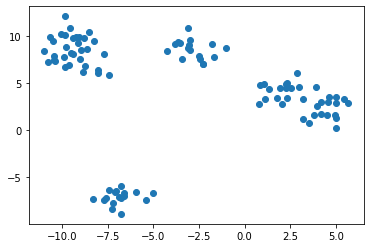

In [69]:
plt.scatter(X[:, 0], X[:, 1])

In [70]:
class Cluster:
    
    def __init__(self, center, name):
        self.center = center
        self.name = name
        self.points= []
        
    def distance(self, point):
        return np.sqrt(np.sum((self.center - point) ** 2))
    
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points.clear()

class KMeansCustom:
    
    def __init__(self, n_clusters=5, max_iters=20):
        self.max_iters = max_iters
        self.n_clusters = n_clusters
        
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X), name=i)
            clusters.append(cluster)
            
        errors = []
        
        for it in range(self.max_iters):
            
            # voting
            labels = []
            
            for point in X:
                
                # collect distance of point to all clusters
                distances = []
                for cluster in clusters:
                    distance = cluster.distance(point)
                    distances.append((distance, cluster.name))
                
                # sort and select cluster with min distance 
                distance, cluster_name = sorted(distances)[0]
                
                # customer voted who
                labels.append(cluster_name)
                
                # who voted me
                cluster = clusters[cluster_name]
                cluster.points.append(point)
                
            err = self.error(labels, clusters, X)
            errors.append(err)
            
            for cluster in clusters:
                cluster.relocate()
        
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        
        return(errors)
        
        
        
    
    def error(self, labels, clusters, X):
        
        err = 0
        
        for point, label in zip(X, labels):
            cluster = clusters[label]
            err += cluster.distance(point)
        
        return err / len(X)
            
        

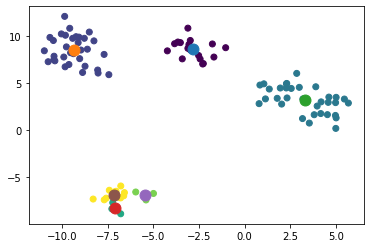

In [73]:
model = KMeansCustom(6)

errors = model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=120)

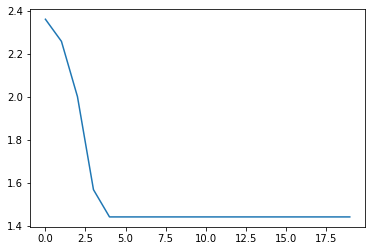

In [74]:
plt.plot(errors)